# Introduction to Natural Language Processing and NLTK

_January 15, 2021_

Agenda today:
- Text analytics and NLP
- Pre-Prosessing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
- Feature Engineering for NLP
    - Bag-of-Words
    - Term frequency-Inverse Document Frequency (tf-idf)
- Text Classification
    - Use features from text to detect satire
- Next Steps/Project Ideas :)
    - Document clustering: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis(LSA) 
    - Word Embeddings

## Part I. Text Analytics and NLP
NLP allows computers to interact with text data in a structured and sensible way. In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Classifying documents 
- Speech recognition and audio processing 

In this section, we will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

#### Overview of NLP process 
<img src="attachment:Screen%20Shot%202019-03-22%20at%207.35.58%20AM.png" style="width:500px;">

## Part II. Pre-Prosessing for NLP

In [1]:
#!pip install nltk
#!pip install wordcloud

In [2]:
review = 'From the beginning of the movie, it gives the feeling the director is trying to portray something, what I mean to say that instead of the story dictating the style in which the movie should be made, he has gone in the opposite way, he had a type of move that he wanted to make, and wrote a story to suite it. And he has failed in it very badly. I guess he was trying to make a stylish movie. Any way I think this movie is a total waste of time and effort. In the credit of the director, he knows the media that he is working with, what I am trying to say is I have seen worst movies than this. Here at least the director knows to maintain the continuity in the movie. And the actors also have given a decent performance.'

In [4]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Tokenization 
Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here"
"David works", "works here"

In [5]:
review

'From the beginning of the movie, it gives the feeling the director is trying to portray something, what I mean to say that instead of the story dictating the style in which the movie should be made, he has gone in the opposite way, he had a type of move that he wanted to make, and wrote a story to suite it. And he has failed in it very badly. I guess he was trying to make a stylish movie. Any way I think this movie is a total waste of time and effort. In the credit of the director, he knows the media that he is working with, what I am trying to say is I have seen worst movies than this. Here at least the director knows to maintain the continuity in the movie. And the actors also have given a decent performance.'

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(review)

The RegexpTokenizer is a tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [7]:
print(tokenized_review)

['From', 'the', 'beginning', 'of', 'the', 'movie', 'it', 'gives', 'the', 'feeling', 'the', 'director', 'is', 'trying', 'to', 'portray', 'something', 'what', 'I', 'mean', 'to', 'say', 'that', 'instead', 'of', 'the', 'story', 'dictating', 'the', 'style', 'in', 'which', 'the', 'movie', 'should', 'be', 'made', 'he', 'has', 'gone', 'in', 'the', 'opposite', 'way', 'he', 'had', 'a', 'type', 'of', 'move', 'that', 'he', 'wanted', 'to', 'make', 'and', 'wrote', 'a', 'story', 'to', 'suite', 'it', 'And', 'he', 'has', 'failed', 'in', 'it', 'very', 'badly', 'I', 'guess', 'he', 'was', 'trying', 'to', 'make', 'a', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'this', 'movie', 'is', 'a', 'total', 'waste', 'of', 'time', 'and', 'effort', 'In', 'the', 'credit', 'of', 'the', 'director', 'he', 'knows', 'the', 'media', 'that', 'he', 'is', 'working', 'with', 'what', 'I', 'am', 'trying', 'to', 'say', 'is', 'I', 'have', 'seen', 'worst', 'movies', 'than', 'this', 'Here', 'at', 'least', 'the', 'director', 'knows

In [8]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 78 samples and 145 outcomes>


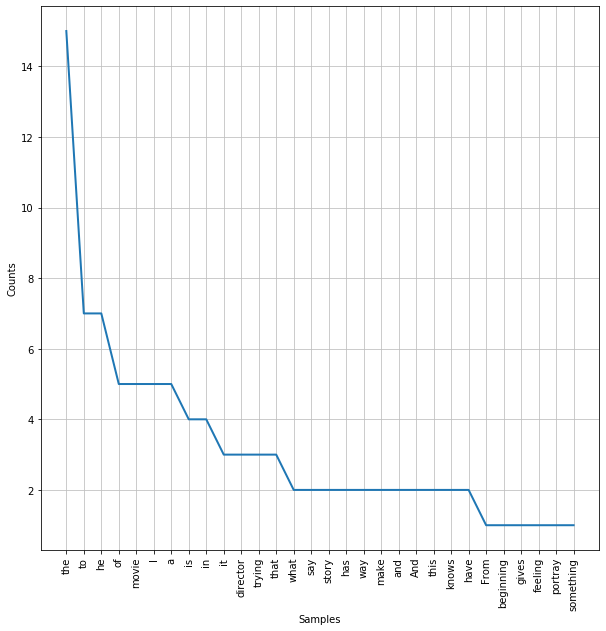

In [11]:
plt.figure(figsize=(10,10))
fdist.plot(30)

Are the words very informative? If we were to extract informatiom based on this frequency distribution of the most common words in tis graph, are we going to get some helpful information or not? Why or why not?

### Stopwords Removal

In [12]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'themselves', 'does', 'where', 'hadn', 'few', 'for', "wouldn't", 'being', 'won', 'too', 'while', 'we', "shouldn't", 'its', 'yourselves', 'theirs', 'same', 'd', 'were', 'below', 'should', 'not', 'wasn', 'a', "it's", "mustn't", 'll', 'but', 'to', 'between', "couldn't", 're', 'just', 'what', 'ain', 'with', 'by', 'couldn', 'o', 'an', 'about', 'yourself', 'her', "didn't", 'down', "hasn't", 'was', 'than', "that'll", 'myself', 'did', "wasn't", 'because', 'above', 'weren', 'i', 'no', 'do', 'during', 'own', 'my', 'over', 'will', 'doesn', "haven't", 'against', "you'll", "don't", 'his', 'your', 'that', 'can', 'it', 'off', 'why', 'only', "weren't", "you've", 'nor', "should've", 'doing', 'whom', 'is', 'wouldn', 'through', 'who', 'on', 'then', 'had', 'out', 'under', 'so', "shan't", 'me', 'in', 'when', "she's", 'them', 'before', 'other', 'which', 'ourselves', 'ma', 'hasn', 'ours', 'been', 'she', 'of', 'needn', 'has', 'mustn', 'haven', 'be', 'our', 'itself', 't', 'the', "mightn't", "you'd", "aren't",

In [13]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
print("Filterd Sentence:",filtered_review)

Filterd Sentence: ['From', 'beginning', 'movie', 'gives', 'feeling', 'director', 'trying', 'portray', 'something', 'I', 'mean', 'say', 'instead', 'story', 'dictating', 'style', 'movie', 'made', 'gone', 'opposite', 'way', 'type', 'move', 'wanted', 'make', 'wrote', 'story', 'suite', 'And', 'failed', 'badly', 'I', 'guess', 'trying', 'make', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'movie', 'total', 'waste', 'time', 'effort', 'In', 'credit', 'director', 'knows', 'media', 'working', 'I', 'trying', 'say', 'I', 'seen', 'worst', 'movies', 'Here', 'least', 'director', 'knows', 'maintain', 'continuity', 'movie', 'And', 'actors', 'also', 'given', 'decent', 'performance']


In [14]:
print(len(tokenized_review))
print(len(filtered_review))

145
72


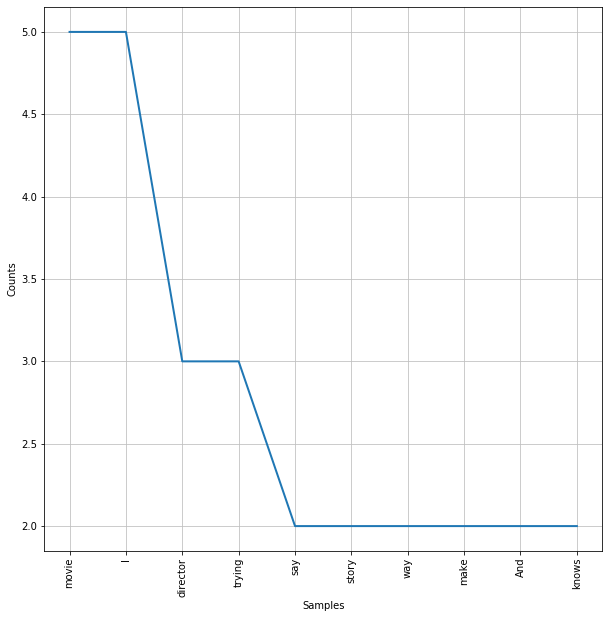

In [15]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(10,10))
fdist.plot(10)

Now that we have removed semantically meaningless words, can we possibly have other types of problem?

#### Lexicon Normalization 
Aside from stopwords, a different type of noise can arise in NLP. For example, collect, collection, collected, and collecting are all similar words. Using stemming and lemmatization would reduce all variations of the same word to the root version of all its derivations. 

###### Stemming 
Stemming allows us to remove different variations of the same word. For example, collect, collection and collecting will all be reduced to the same single word collect.
- Stemming is the process of reducing inflection in words to their root forms, such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.
 
- Stems are created by removing the suffixes or prefixes used with a word.
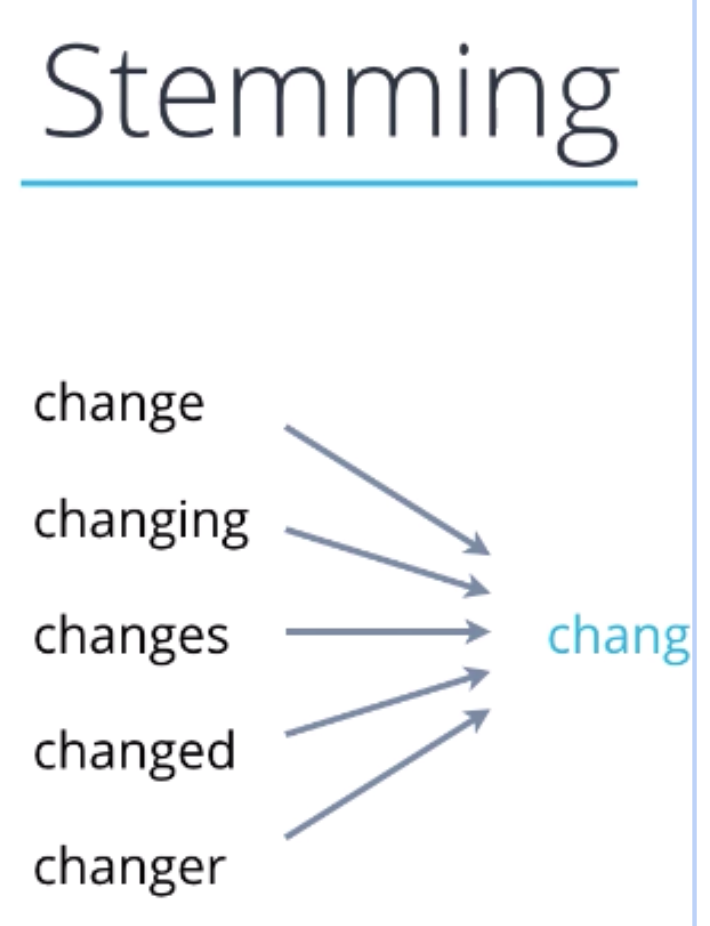

In [16]:
# Stemming
from nltk.stem import PorterStemmer

In [17]:
ps = PorterStemmer()

stemmed_review=[]
for w in filtered_review:
    stemmed_review.append(ps.stem(w))

print(stemmed_review)

['from', 'begin', 'movi', 'give', 'feel', 'director', 'tri', 'portray', 'someth', 'I', 'mean', 'say', 'instead', 'stori', 'dictat', 'style', 'movi', 'made', 'gone', 'opposit', 'way', 'type', 'move', 'want', 'make', 'wrote', 'stori', 'suit', 'and', 'fail', 'badli', 'I', 'guess', 'tri', 'make', 'stylish', 'movi', 'ani', 'way', 'I', 'think', 'movi', 'total', 'wast', 'time', 'effort', 'In', 'credit', 'director', 'know', 'media', 'work', 'I', 'tri', 'say', 'I', 'seen', 'worst', 'movi', 'here', 'least', 'director', 'know', 'maintain', 'continu', 'movi', 'and', 'actor', 'also', 'given', 'decent', 'perform']


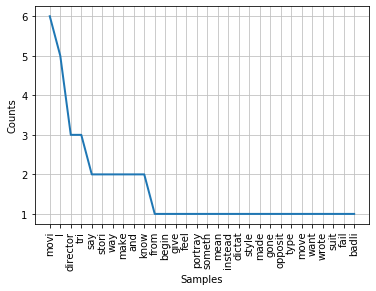

In [18]:
fdist = FreqDist(stemmed_review)
fdist.plot(30)

#### Lemmatization
The only difference between lemmatization and stemming is that lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

<img src="attachment:Screen%20Shot%202019-08-13%20at%2010.45.08%20AM.png" width=400;>

In [19]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 


In [20]:
print("movies:", lemmatizer.lemmatize("movies")) 
print("collecting:", lemmatizer.lemmatize("collecting")) 
print("collection:", lemmatizer.lemmatize("collection")) 
print("collections:", lemmatizer.lemmatize("collections")) 

movies: movie
collecting: collecting
collection: collection
collections: collection


In [21]:
# comparing it with stemming 
print("movies:", ps.stem("movies")) 
print("collecting :", ps.stem("collecting")) 

movies: movi
collecting : collect


In [22]:
# we can also lemmatize our original reviews
lemmatized_review=[]
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))

print(lemmatized_review)

['From', 'beginning', 'movie', 'give', 'feeling', 'director', 'trying', 'portray', 'something', 'I', 'mean', 'say', 'instead', 'story', 'dictating', 'style', 'movie', 'made', 'gone', 'opposite', 'way', 'type', 'move', 'wanted', 'make', 'wrote', 'story', 'suite', 'And', 'failed', 'badly', 'I', 'guess', 'trying', 'make', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'movie', 'total', 'waste', 'time', 'effort', 'In', 'credit', 'director', 'know', 'medium', 'working', 'I', 'trying', 'say', 'I', 'seen', 'worst', 'movie', 'Here', 'least', 'director', 'know', 'maintain', 'continuity', 'movie', 'And', 'actor', 'also', 'given', 'decent', 'performance']


## Part III. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called Bag-of-words (BoW). 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I really really really love cats"
- Document 3: "I love all animals"
- Document 4: "I hate dogs"


Can be represented as:
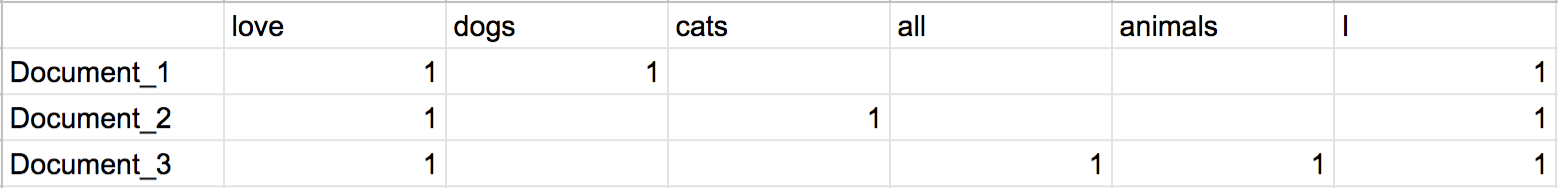

In [23]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

docs = ['i love dogs','i love cats','i love all animals']
vec = CountVectorizer(stop_words=None)
X = vec.fit_transform(docs)


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,all,animals,cats,dogs,love
0,0,0,0,1,1
1,0,0,1,0,1
2,1,1,0,0,1


In [24]:
vec.get_feature_names()

['all', 'animals', 'cats', 'dogs', 'love']

### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

- TF (Term Frequency)
term frequency is simply the frequency of words in a document, and it can be represented as the number of times a term shows up in a document. 

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number of documents}{num of documents containing W})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [25]:
# let's implement it 
import pandas as pd
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['review'])


In [27]:
text_counts

<4x275 sparse matrix of type '<class 'numpy.int64'>'
	with 308 stored elements in Compressed Sparse Row format>

In [28]:
type(text_counts)

scipy.sparse.csr.csr_matrix

In [29]:
pd.DataFrame(text_counts)

,0
0,"(0, 5)\t1\n (0, 0)\t4\n (0, 9)\t2\n (0, 1..."
1,"(0, 100)\t1\n (0, 84)\t3\n (0, 233)\t4\n ..."
2,"(0, 100)\t3\n (0, 25)\t4\n (0, 84)\t3\n (..."
3,"(0, 25)\t6\n (0, 226)\t1\n (0, 233)\t2\n ..."


In [30]:
df = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
df

,10,2,30,4,50,6,able,abusive,acquainted,acting,...,woman,won,worker,working,worth,write,writer,young,yuppie,z
0,4,1,1,3,2,1,0,0,0,2,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,1,1,1,1,0,0,0,1,1,0


In [31]:
df.columns

Index(['10', '2', '30', '4', '50', '6', 'able', 'abusive', 'acquainted',
       'acting',
       ...
       'woman', 'won', 'worker', 'working', 'worth', 'write', 'writer',
       'young', 'yuppie', 'z'],
      dtype='object', length=275)

In [32]:
# use tfidf vectorizer instead
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words=stop_words, lowercase=True, ngram_range=(1,1))
text_tf= tf.fit_transform(df['review'])
text_tf.data

array([0.08907547, 0.08907547, 0.17815093, 0.08907547, 0.08907547,
       0.08907547, 0.04648327, 0.08907547, 0.08907547, 0.07022812,
       0.08907547, 0.08907547, 0.08907547, 0.08907547, 0.08907547,
       0.08907547, 0.08907547, 0.08907547, 0.08907547, 0.08907547,
       0.08907547, 0.08907547, 0.14045624, 0.07022812, 0.08907547,
       0.08907547, 0.08907547, 0.08907547, 0.08907547, 0.07022812,
       0.08907547, 0.08907547, 0.08907547, 0.08907547, 0.07022812,
       0.05685572, 0.07022812, 0.08907547, 0.08907547, 0.08907547,
       0.07022812, 0.07022812, 0.08907547, 0.08907547, 0.07022812,
       0.08907547, 0.2672264 , 0.08907547, 0.08907547, 0.08907547,
       0.08907547, 0.08907547, 0.08907547, 0.14045624, 0.08907547,
       0.17056715, 0.08907547, 0.08907547, 0.17815093, 0.08907547,
       0.45484573, 0.17056715, 0.08907547, 0.17815093, 0.35630186,
       0.07352768, 0.07352768, 0.07352768, 0.07352768, 0.05797007,
       0.07352768, 0.04693177, 0.07352768, 0.07352768, 0.07352

In [40]:
# examine what type of object text_tf is

In [41]:
# what does this function do?
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

def fn_tdm_df(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df



In [42]:
fn_tdm_df(df['review']).T

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,4,1,2,0,0,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,1,1,1


In [43]:
# what about this function?
def fn_tdm_tfidf(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    tf = TfidfVectorizer(**kwargs)
    x1 = tf.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = tf.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df

In [44]:
fn_tdm_tfidf(df['review']).transpose()

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,0.27707,0.069267,0.138535,0.000000,0.000000,0.000000,0.000000,0.138535,0.000000,0.000000,...,0.000000,0.000000,0.069267,0.000000,0.000000,0.069267,0.044212,0.000000,0.054611,0.000000
1,0.00000,0.000000,0.000000,0.042847,0.000000,0.000000,0.000000,0.000000,0.042847,0.042847,...,0.000000,0.000000,0.000000,0.042847,0.000000,0.000000,0.027349,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067858,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.059012,0.059012,0.000000,0.000000,0.000000,...,0.059012,0.046525,0.000000,0.000000,0.000000,0.000000,0.037666,0.059012,0.046525,0.059012


## Text Classification
Now that you have a great basic understanding of feature engineering and preprosessing in NLP, we can move on to text classification using Naive Bayes and other classification algorithm. We can treat the engineered dataframes like any other dataframes that you have worked with before. 

Now, how would Naive Bayes treat the classification problem? What is the prior, posterior, and evidence, in the calculation?

### 1. Preprocessing & Cleaning 

In [45]:
df = pd.read_csv('nlp_classification.csv')

In [46]:
df.head()

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1


In [47]:
df.body[0]

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [48]:
data = df['body']
target = df['target']

In [49]:
import string, re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com']
sw_set = set(sw_list)

In [51]:
# we can define a function that removes stopwords 
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [52]:
# applying the above function to our data/features 
processed_data = list(map(process_article, data))

In [53]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

26668

In [54]:
# creating a list with all lemmatized outputs
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [56]:
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
# X[3]

### 2. Corpus Statistics and Exploratory Data Analysis

In [57]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer()

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<800x19673 sparse matrix of type '<class 'numpy.float64'>'
	with 130781 stored elements in Compressed Sparse Row format>

In [58]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 163.47625
Percentage of columns containing ZERO: 0.9916903243023433


#### Most Frequent Words

In [59]:
df_freq_satire = df[df['target']==1]
df_freq_not_satire = df[df['target']==0]

In [60]:
data_sat = df_freq_satire['body']
data_not_sat = df_freq_not_satire['body']

In [61]:
pros_satire = list(map(process_article, data_sat))
pros_not_satire = list(map(process_article, data_not_sat))

In [62]:
total_vocab_sat = set()
for comment in pros_satire:
    total_vocab_sat.update(comment)
len(total_vocab_sat)

19090

In [63]:
total_vocab_NOT_sat = set()
for comment in pros_not_satire:
    total_vocab_NOT_sat.update(comment)
len(total_vocab_NOT_sat)

15185

In [64]:
print(pros_satire[:2])

[['noting', 'resignation', 'james', 'mattis', 'secretary', 'defense', 'marked', 'ouster', 'third', 'top', 'administration', 'official', 'less', 'three', 'weeks', 'worried', 'populace', 'told', 'reporters', 'friday', 'unsure', 'many', 'former', 'trump', 'staffers', 'could', 'safely', 'reabsorb', 'jesus', 'take', 'back', 'assholes', 'once—we', 'need', 'time', 'process', 'get', 'next', '53-year-old', 'gregory', 'birch', 'naperville', 'il', 'echoing', 'concerns', '323', 'million', 'americans', 'also', 'noting', 'country', 'truly', 'beginning', 'reintegrate', 'former', 'national', 'security', 'advisor', 'michael', 'flynn', 'sustainable', 'say', 'handle', 'maybe', 'two', 'former', 'members', 'trump', 'inner', 'circle', 'remainder', 'year', 'country', 'limits.', 'u.s.', 'populace', 'confirmed', 'could', 'handle', 'pieces', 'shit', 'trying', 'rejoin', 'society'], ['desperate', 'unwind', 'months', 'nonstop', 'work', 'investigating', 'russian', 'influence', '2016', 'election', 'visibly', 'exhaus

In [65]:
# Preprocessing:
# We will use these again later on
# FORMAT:  flat_list = [item for sublist in l for item in sublist]

flat_satire = [item for sublist in pros_satire for item in sublist]
flat_not_satire = [item for sublist in pros_not_satire for item in sublist]

In [66]:
satire_freq = FreqDist(flat_satire)
not_satire_freq = FreqDist(flat_not_satire)

In [67]:
# Top 20 satire words:

satire_freq.most_common(20)

[('people', 606),
 ('eu', 585),
 ('would', 563),
 ('may', 504),
 ('like', 474),
 ('even', 415),
 ('time', 381),
 ('many', 380),
 ('get', 346),
 ('also', 346),
 ('brexit', 336),
 ('britain', 312),
 ('world', 301),
 ('way', 289),
 ('well', 289),
 ('new', 281),
 ('see', 270),
 ('every', 262),
 ('right', 256),
 ('us', 251)]

In [68]:
# Top 20 non-satire words:

not_satire_freq.most_common(20)

[('u.s.', 675),
 ('trump', 617),
 ('government', 578),
 ('would', 524),
 ('president', 516),
 ('people', 389),
 ('state', 365),
 ('year', 336),
 ('told', 332),
 ('new', 324),
 ('security', 322),
 ('also', 319),
 ('last', 319),
 ('two', 309),
 ('united', 301),
 ('reuters', 295),
 ('could', 294),
 ('china', 283),
 ('country', 279),
 ('percent', 274)]

#### Normalized word frequencies:

In [69]:
satire_total_word_count = sum(satire_freq.values())
satire_top_25 = satire_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in satire_top_25:
    normalized_frequency = word[1]/satire_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

people 		 0.005193
eu 		 0.005013
would 		 0.004825
may 		 0.004319
like 		 0.004062
even 		 0.003556
time 		 0.003265
many 		 0.003256
get 		 0.002965
also 		 0.002965
brexit 		 0.002879
britain 		 0.002674
world 		 0.002579
way 		 0.002477
well 		 0.002477
new 		 0.002408
see 		 0.002314
every 		 0.002245
right 		 0.002194
us 		 0.002151
much 		 0.002074
however 		 0.002048
could 		 0.00204
trump 		 0.002022
theresa 		 0.001945


In [70]:
not_satire_total_word_count = sum(not_satire_freq.values())
not_satire_top_25 = not_satire_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in not_satire_top_25:
    normalized_frequency = word[1]/not_satire_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

u.s. 		 0.006156
trump 		 0.005627
government 		 0.005272
would 		 0.004779
president 		 0.004706
people 		 0.003548
state 		 0.003329
year 		 0.003065
told 		 0.003028
new 		 0.002955
security 		 0.002937
also 		 0.002909
last 		 0.002909
two 		 0.002818
united 		 0.002745
reuters 		 0.002691
could 		 0.002681
china 		 0.002581
country 		 0.002545
percent 		 0.002499
since 		 0.002344
states 		 0.002271
monday 		 0.002253
house 		 0.002244
police 		 0.002079


#### Let's visualize it!

In [71]:
# create counts of satire and not satire with values and words
satire_bar_counts = [x[1] for x in satire_freq.most_common(25)]
satire_bar_words = [x[0] for x in satire_freq.most_common(25)]

not_satire_bar_counts = [x[1] for x in not_satire_freq.most_common(25)]
not_satire_bar_words = [x[0] for x in not_satire_freq.most_common(25)]

In [72]:
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

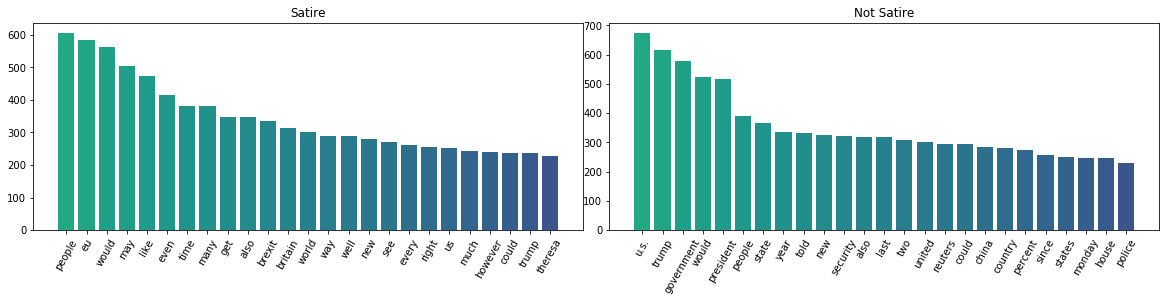

In [73]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(satire_bar_words, satire_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(not_satire_bar_words, not_satire_bar_counts, color=color )

ax.title.set_text('Satire')
ax2.title.set_text('Not Satire')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

#### Word Clouds

In [77]:
# Getting our data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
# !pip install wordcloud
from wordcloud import WordCloud
satire_dictionary = dict(zip(satire_bar_words, satire_bar_counts))
not_satire_dictionary = dict(zip(not_satire_bar_words, not_satire_bar_counts))

In [78]:
# Preview the satire dictionary:

# satire_dictionary

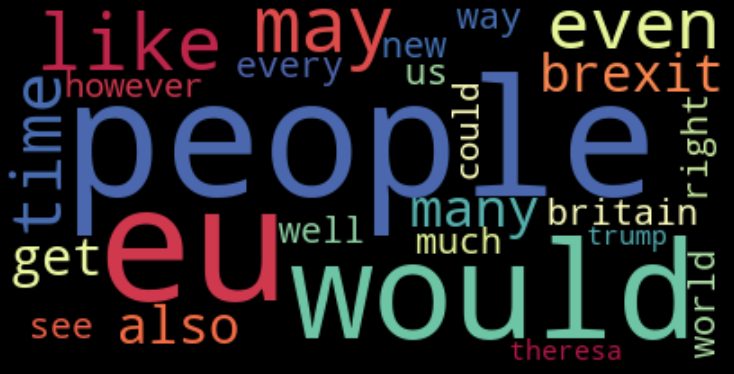

In [79]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(satire_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

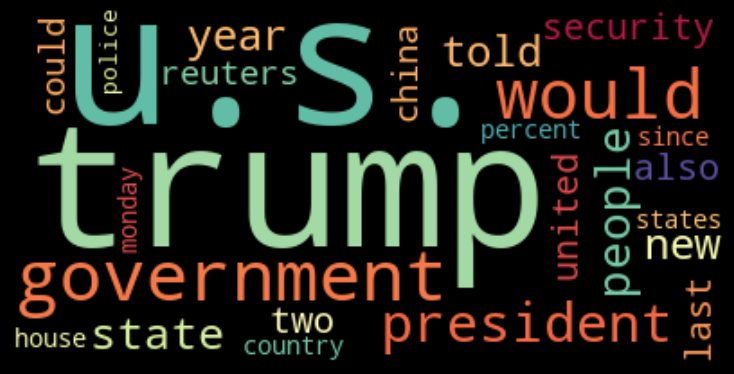

In [80]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_satire_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

#### Let's classify!

In [81]:
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)

In [82]:
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [83]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.97

F1 Score: 0.9691


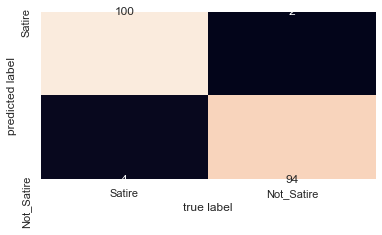

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Satire', 'Not_Satire'], yticklabels=['Satire', 'Not_Satire'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Discussion - how would Naive Bayes treat the features?

In [ ]:
## your turn - use naive bayes to classify satire vs not satire?

# what kind of naive bayes are we going to use?

# Conclusions and Next Steps
- Learning foundations of NLP allows us represent our language in a way that computers understand
- We can use the machine learning algorithms that we already learned to classify text documents
- However, there are still disadvantages to represent language this way
- Topic Modeling 
- Word embeddings: word2vec and doc2vec
